<a href="https://colab.research.google.com/github/P-AshishKumar/2d-car-game/blob/master/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Word Embeddings Demo: Pretrained vs LLM Methods
This demo showcases how to generate and compare document embeddings using sample texts from healthcare, railroad, and finance.

In [1]:
# Sample documents grouped by domain
docs = {
    "Blue Cross": [
        "Patient reported shortness of breath and was diagnosed with asthma. Prescribed salbutamol.",
        "John Doe suffered a minor stroke and was admitted to the ER. He is on blood thinners.",
        "Mary has chronic back pain and is being referred to physiotherapy."
    ],
    "Union Pacific": [
        "Locomotive UPX-101 failed due to coolant system issues. The radiator was replaced.",
        "Gearbox malfunction observed in engine #UPX-202. Repair scheduled for next week.",
        "UPX-303 required oil change and axle inspection after long haul run."
    ],
    "Farm Credit": [
        "James applied for a $150,000 loan to buy irrigation equipment. His credit score is 690.",
        "Loan request of $200,000 submitted for cattle farm expansion by Rachel.",
        "Farmers seeking $300,000 to upgrade grain silos and purchase new tractors."
    ]
}

# Flatten for processing
documents = []
labels = []
for domain, entries in docs.items():
    for entry in entries:
        documents.append(entry)
        labels.append(domain)

for i, doc in enumerate(documents):
    print(f"\n[{labels[i]}] {doc}")


[Blue Cross] Patient reported shortness of breath and was diagnosed with asthma. Prescribed salbutamol.

[Blue Cross] John Doe suffered a minor stroke and was admitted to the ER. He is on blood thinners.

[Blue Cross] Mary has chronic back pain and is being referred to physiotherapy.

[Union Pacific] Locomotive UPX-101 failed due to coolant system issues. The radiator was replaced.

[Union Pacific] Gearbox malfunction observed in engine #UPX-202. Repair scheduled for next week.

[Union Pacific] UPX-303 required oil change and axle inspection after long haul run.

[Farm Credit] James applied for a $150,000 loan to buy irrigation equipment. His credit score is 690.

[Farm Credit] Loan request of $200,000 submitted for cattle farm expansion by Rachel.

[Farm Credit] Farmers seeking $300,000 to upgrade grain silos and purchase new tractors.


## 🔡 Embeddings using Sentence Transformers (Pretrained)

In [2]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(documents)

print("Shape of embeddings:", embeddings.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Shape of embeddings: (9, 384)


## 🔍 Find Similar Documents (Cosine Similarity)

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(embeddings)

# Example: Find most similar to the first Blue Cross document
query_idx = 0
scores = list(enumerate(similarity_matrix[query_idx]))
sorted_scores = sorted(scores, key=lambda x: -x[1])[1:4]

print(f"\nMost similar documents to: {documents[query_idx]}\n")
for idx, score in sorted_scores:
    print(f"Score: {score:.2f} | [{labels[idx]}] {documents[idx]}")


Most similar documents to: Patient reported shortness of breath and was diagnosed with asthma. Prescribed salbutamol.

Score: 0.25 | [Blue Cross] Mary has chronic back pain and is being referred to physiotherapy.
Score: 0.23 | [Blue Cross] John Doe suffered a minor stroke and was admitted to the ER. He is on blood thinners.
Score: 0.03 | [Union Pacific] Gearbox malfunction observed in engine #UPX-202. Repair scheduled for next week.


## 📊 Visualize Embeddings in 2D Space

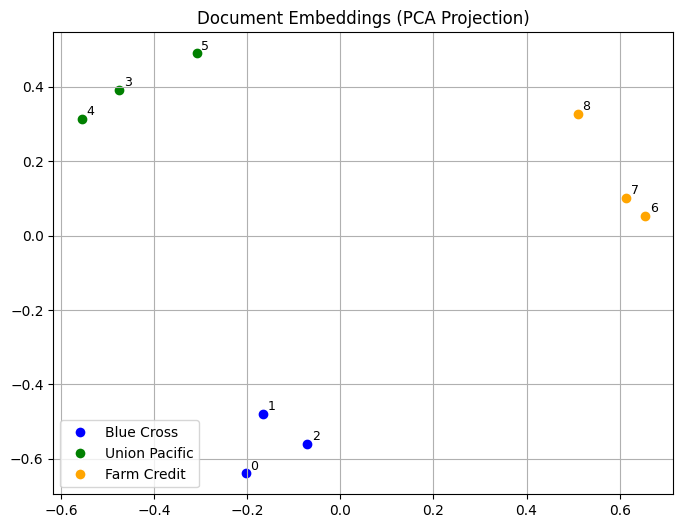

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

colors = {'Blue Cross': 'blue', 'Union Pacific': 'green', 'Farm Credit': 'orange'}
plt.figure(figsize=(8,6))
for i, point in enumerate(reduced):
    plt.scatter(point[0], point[1], color=colors[labels[i]], label=labels[i])
    plt.text(point[0]+0.01, point[1]+0.01, str(i), fontsize=9)

plt.title("Document Embeddings (PCA Projection)")
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=8) for label, color in colors.items()]
plt.legend(handles=handles)
plt.grid(True)
plt.show()

## 💡 Discussion Points
- Do documents from the same domain cluster together?
- Are there cross-domain similarities?
- How do pretrained embeddings perform for niche domains like locomotives?

### 🔧 Optional Additions:
- Use domain-adapted or fine-tuned embedding models
- Try prompt-based summarization or LLM-generated embeddings
- Use t-SNE or UMAP for non-linear embedding projection

## 🧠 Prompt-Based Embedding with OpenAI or Cohere APIs
**Note:** Requires API key setup. Uncomment and configure your API key before running.

In [14]:
#Uncomment to use OpenAI embeddings
from openai import OpenAI
client = OpenAI(api_key = "OPENAI_API_KEY")

def get_openai_embedding(text):
    response = client.embeddings.create(
        input=[text],
        model="text-embedding-3-small"
    )

    response = response
    print("Generated OpenAI embeddings ", response)
    return response

openai_embeddings = [get_openai_embedding(doc) for doc in documents]
# print("Generated OpenAI embeddings for all documents.", openai_embeddings)

Generated OpenAI embeddings  CreateEmbeddingResponse(data=[Embedding(embedding=[-0.003855847753584385, -0.03140192851424217, -0.016485407948493958, 0.01467515155673027, -0.038498133420944214, 0.028408968821167946, -0.052328500896692276, -0.0031347619369626045, 0.003994633909314871, 0.007530669681727886, -0.05787995457649231, -0.0409359484910965, 0.008097883313894272, 0.020274879410862923, 7.460239430656657e-06, 0.02659871242940426, 0.025295326486229897, -0.0156406220048666, -0.04071871563792229, 0.001979214372113347, 0.003376129548996687, 0.02725040353834629, 0.011736500076949596, -0.04190141707658768, -0.007802208419889212, -0.0437358133494854, -0.006287626456469297, -0.08129261434078217, 0.011320141144096851, 0.01805429719388485, 0.03997047618031502, -0.019212862476706505, 0.008152191527187824, 0.021264487877488136, 0.0077479006722569466, 0.002326180459931493, -0.03149847313761711, 0.0030744201503694057, 0.013456244952976704, 0.0017137101385742426, -0.02453501895070076, -0.0764169916

In [17]:
pip install cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.0 MB/s eta 0:00:00


In [23]:
# Uncomment to use Cohere embeddings
import cohere
co = cohere.ClientV2("COHERE_API_KEY")

def get_cohere_embeddings(texts):
    response = co.embed(
                        texts=texts,
                        model="embed-multilingual-v3.0",
                        input_type="classification",
                        embedding_types=["float"])

    print("Generated Cohere embeddings" , response)
    return response.embeddings

cohere_embeddings = get_cohere_embeddings(documents)
# print("Generated Cohere embeddings for all documents.", cohere_embeddings )

Generated Cohere embeddings id='d39e0f11-39a1-4ef2-849f-f1a6fbff0289' embeddings=EmbedByTypeResponseEmbeddings(float_=[[-0.010002136, 0.0028820038, 0.00095272064, -0.014167786, -0.028640747, -0.014045715, -0.022537231, -0.03842163, -0.023452759, 0.032196045, 0.04437256, 0.007331848, 0.024475098, -0.008522034, 0.052001953, 0.0031204224, 0.042999268, 0.025253296, 0.027450562, -0.03173828, -0.0357666, -0.0037670135, 0.060821533, -0.025131226, -0.01776123, 0.001824379, 0.016983032, 0.00025629997, 0.046417236, 0.0014486313, 0.0073547363, -0.022583008, 0.030654907, 0.03250122, 0.016021729, 0.0005059242, 0.034088135, 0.0023155212, 0.007949829, -0.0146484375, 0.05142212, -0.013122559, -0.021240234, 0.013145447, -0.014434814, -0.012069702, 0.023025513, 0.027328491, 0.041503906, -0.010421753, 0.009170532, 0.0031147003, -0.0030956268, -0.020736694, 0.022628784, 0.001496315, 0.070007324, -0.088012695, -0.028701782, -0.056121826, -0.02897644, -0.07312012, -0.0025119781, 0.0036697388, 0.05230713, 0.

## 📌 Cluster Documents Based on Embeddings

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Cluster using pretrained MiniLM embeddings
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Compare clusters to true labels
true_labels = [0 if l == 'Blue Cross' else 1 if l == 'Union Pacific' else 2 for l in labels]
ari = adjusted_rand_score(true_labels, clusters)
print(f"Adjusted Rand Index (cluster vs. true labels): {ari:.2f}")

Adjusted Rand Index (cluster vs. true labels): 1.00


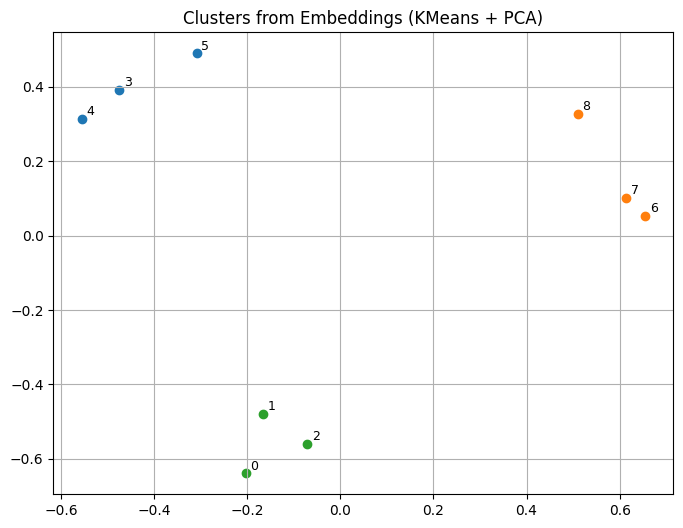

In [16]:
# Visualize clusters in 2D using PCA
plt.figure(figsize=(8,6))
for i, point in enumerate(reduced):
    plt.scatter(point[0], point[1], c=f'C{clusters[i]}')
    plt.text(point[0]+0.01, point[1]+0.01, str(i), fontsize=9)

plt.title("Clusters from Embeddings (KMeans + PCA)")
plt.grid(True)
plt.show()